# Comparisons of Axis-Aligned and Oblique Random Forests

We refer to the scikit-learn tutorial in [1](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py) that shows a similar comparison for regular axis-aligned Decision trees.



In [1]:
!conda info


     active environment : base
    active env location : /Users/adam2392/miniconda3
            shell level : 1
       user config file : /Users/adam2392/.condarc
 populated config files : /Users/adam2392/.condarc
          conda version : 4.11.0
    conda-build version : not installed
         python version : 3.9.5.final.0
       virtual packages : __osx=10.16=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /Users/adam2392/miniconda3  (writable)
      conda av data dir : /Users/adam2392/miniconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/conda-forge/osx-64
                          https://conda.anaconda.org/conda-forge/noarch
          package cache : /Users/adam2392/miniconda3/pkgs
                          /Users/adam2392/.conda/pkgs
       envs directories : /Users/adam2392/miniconda3/envs
                          /Users/adam2392/.conda/envs
               platfor

In [2]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier, ObliqueDecisionTreeClassifier
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

First, let's load in some data. For comparisons to the regular ``DecisionTreeClassifier``, we will use the iris dataset.

In [3]:
iris = load_iris()

In [4]:
X, y = iris.data, iris.target

In [5]:
# either axis-aligned
clf = DecisionTreeClassifier()

# or oblique
# clf = ObliqueDecisionTreeClassifier()

In [6]:
clf = clf.fit(X, y)

### Exploring the Decision Surface of an Oblique Tree

In [9]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3.3, 8.880000000000006, 1.0, 5.380000000000004)

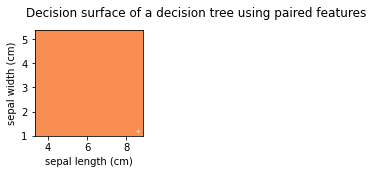

In [14]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    # Train
    clf = DecisionTreeClassifier().fit(X, y)


    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    break
    # Plot the training points
#     for i, color in zip(range(n_classes), plot_colors):
#         idx = np.where(y == i)
#         plt.scatter(
#             X[idx, 0],
#             X[idx, 1],
#             c=color,
#             label=iris.target_names[i],
#             cmap=plt.cm.RdYlBu,
#             edgecolor="black",
#             s=15,
#         )

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of /Users/adam2392/Documents/scikit-learn/sklearn/__check_build:
__init__.py               __pycache__               _check_build.c
setup.py                  _check_build.pyx          _check_build.cpython-38-darwin.so
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.